# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

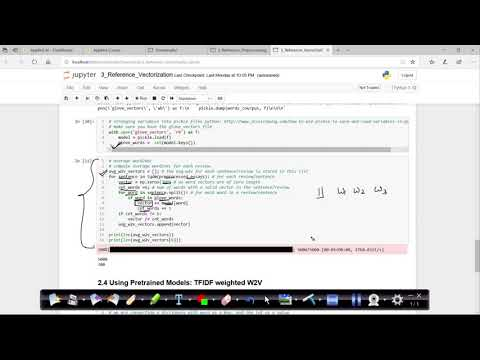

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:
#please use below code to load glove vectors 
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

```python
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python:
# http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
```

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)

# neg = sid.polarity_scores(sample_sentence_1)['neg']
# neu = sid.polarity_scores(sample_sentence_1)['neu']
# pos = sid.polarity_scores(sample_sentence_1)['pos']
# comp = sid.polarity_scores(sample_sentence_1)['compound']
# print(f"'neg': {neg}, 'neu': {neu}, 'pos': {pos}, 'compound': {comp}")

sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [4]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as offline
from prettytable import PrettyTable

from tqdm.notebook import tqdm
from wordcloud import WordCloud
from scipy.sparse import hstack

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('preprocessed_data.csv', nrows = 50000)

In [5]:
print(f'Input Data shape : {data.shape[0]} rows and {data.shape[1]} columns/dimentions')

# print('Column names :', list(data.columns))

Input Data shape : 50000 rows and 9 columns/dimentions


In [6]:
# 1. calculate sentiment scores for the essay feature

# https://www.analyticsvidhya.com/blog/2021/12/different-methods-for-calculating-sentiment-score-of-text/
#https://github.com/llSourcell/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb

sid = SentimentIntensityAnalyzer()

negative = []
neutral = []
positive = []
compound = []

print('Shape before adding Sentiment Scores : ', data.shape)

for a in tqdm(data['essay']) :
    neg = sid.polarity_scores(a)['neg']
    neu = sid.polarity_scores(a)['neu']
    pos = sid.polarity_scores(a)['pos']
    comp = sid.polarity_scores(a)['compound']
    negative.append(neg)
    neutral.append(neu)
    positive.append(pos)
    compound.append(comp)
    
data['negative'] = negative
data['positive'] = positive
data['neutral'] = neutral
data['compound'] = compound

print('Shape after adding Sentiment Scores : ', data.shape)

Shape before adding Sentiment Scores :  (50000, 9)


  0%|          | 0/50000 [00:00<?, ?it/s]

Shape after adding Sentiment Scores :  (50000, 13)


In [7]:
# 2. Split your data.

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

y_data = data['project_is_approved'].values
x_data = data.drop('project_is_approved', axis = 1)

#using `stratify` on `y_data` to ensure equal spliting
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, stratify = y_data)

In [8]:
# 3. perform tfidf vectorization of text data.

#3_Reference_Vectorization.ipynb

tfidf_vectorizor = TfidfVectorizer(min_df = 10, ngram_range = (1,3), max_features = 15000)
tfidf_vectorizor.fit(x_train['essay'].values)
x_train_tfidf = tfidf_vectorizor.transform(x_train['essay'].values)
x_test_tfidf = tfidf_vectorizor.transform(x_test['essay'].values)

print(f"Shape of matrix before one hot encodig : {x_train.shape} {x_test.shape}")
print(f"Shape of matrix after one hot encodig : {x_train_tfidf.shape} {x_test_tfidf.shape}")

Shape of matrix before one hot encodig : (35000, 12) (15000, 12)
Shape of matrix after one hot encodig : (35000, 15000) (15000, 15000)


In [9]:
# 4. perform tfidf w2v vectorization of text data.

#3_Reference_Vectorization.ipynb

# Converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(tfidf_vectorizor.get_feature_names(), list(tfidf_vectorizor.idf_)))
tfidf_words = set(tfidf_vectorizor.get_feature_names())

tfidf_w2v_x_train = []

for sentence in tqdm(x_train['essay']):
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0
    
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
            
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
        
    tfidf_w2v_x_train.append(vector)
    
print(f'x_train TF-IDF-W2V shape is {len(tfidf_w2v_x_train) , len(tfidf_w2v_x_train[0])}')

tfidf_w2v_x_test = []

for sentence in tqdm(x_test['essay']):
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0
    
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
            
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
        
    tfidf_w2v_x_test.append(vector)

print(f'x_test TF-IDF-W2V shape is {len(tfidf_w2v_x_test) , len(tfidf_w2v_x_test[0])}')

  0%|          | 0/35000 [00:00<?, ?it/s]

x_train TF-IDF-W2V shape is (35000, 300)


  0%|          | 0/15000 [00:00<?, ?it/s]

x_test TF-IDF-W2V shape is (15000, 300)


In [10]:
# 5. perform encoding of categorical features.

'''https://stats.stackexchange.com/a/519081'''

print('Shape of matrix after one hot encodig :')
print('(Categorical features)')
print('='*40)

# school_state
school_state_vector = CountVectorizer(binary=True)
school_state_vector.fit(x_train['school_state'].values)

x_train_school_state = school_state_vector.transform(x_train['school_state'].values)
x_test_school_state = school_state_vector.transform(x_test['school_state'].values)
print('School State\t\t: ',x_train_school_state.shape,',',x_test_school_state.shape)
# print(school_state_vector.get_feature_names()) # Code to printfeature names alone

# teacher_prefix
teacher_prefix_vector = CountVectorizer(binary=True)
teacher_prefix_vector.fit(x_train['teacher_prefix'].values)

x_train_teacher_prefix = teacher_prefix_vector.transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix = teacher_prefix_vector.transform(x_test['teacher_prefix'].values)

print('Teacher Prefix\t\t: ', x_train_teacher_prefix.shape,',',x_test_teacher_prefix.shape)
# print(teacher_prefix_vector.get_feature_names()) # Code to printfeature names alone

# project_grade_category
project_grade_vector = CountVectorizer(binary=True)
project_grade_vector.fit(x_train['project_grade_category'].values)

x_train_project_grade = project_grade_vector.transform(x_train['project_grade_category'].values)
x_test_project_grade = project_grade_vector.transform(x_test['project_grade_category'].values)
print('Project Grades\t\t: ', x_train_project_grade.shape,',',x_test_project_grade.shape)
# print(project_grade_vector.get_feature_names()) # Code to printfeature names alone

# clean_categories
clean_categories_vector = CountVectorizer(binary=True)
clean_categories_vector.fit(x_train['clean_categories'].values)

x_train_clean_categories = clean_categories_vector.transform(x_train['clean_categories'].values)
x_test_clean_categories = clean_categories_vector.transform(x_test['clean_categories'].values)
print('Project Categories\t: ', x_train_clean_categories.shape,',',x_test_clean_categories.shape)
# print(clean_categories_vector.get_feature_names()) # Code to printfeature names alone

# clean_subcategories
clean_subcategories_vector = CountVectorizer(binary=True)
clean_subcategories_vector.fit(x_train['clean_subcategories'].values)

x_train_clean_subcategories = clean_subcategories_vector.transform(x_train['clean_subcategories'].values)
x_test_clean_subcategories = clean_subcategories_vector.transform(x_test['clean_subcategories'].values)
print('Project Subcategories\t: ', x_train_clean_subcategories.shape,',',x_test_clean_subcategories.shape)

Shape of matrix after one hot encodig :
(Categorical features)
School State		:  (35000, 51) , (15000, 51)
Teacher Prefix		:  (35000, 5) , (15000, 5)
Project Grades		:  (35000, 4) , (15000, 4)
Project Categories	:  (35000, 9) , (15000, 9)
Project Subcategories	:  (35000, 30) , (15000, 30)


In [11]:
# 6. perform encoding of numerical features

# since we are giving only a single feature input so array.reshape(-1, 1)

print('Shape of matrix after encodig :')
print('(Numerical features)')
print('='*40)

# price
price_normalizer = Normalizer()
price_normalizer.fit(x_train['price'].values.reshape(-1, 1))

x_train_price = price_normalizer.transform(x_train['price'].values.reshape(-1, 1))
x_test_price = price_normalizer.transform(x_test['price'].values.reshape(-1, 1))
print('Price\t\t\t: ', x_train_price.shape,',',x_test_price.shape)

# teacher_number_of_previously_posted_projects
pervious_project_normalizer = Normalizer()
pervious_project_normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].\
                                values.reshape(-1, 1))

x_train_previous_projects = pervious_project_normalizer.transform(
                x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_test_previous_projects = pervious_project_normalizer.transform(
                x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print('Previous Projects\t: ', x_train_previous_projects.shape,',',x_test_previous_projects.shape)

# Normalizing Sentiment Scores

# negative
negative_normalizer = Normalizer()
negative_normalizer.fit(x_train['negative'].values.reshape(-1, 1))

x_train_negative = negative_normalizer.transform(x_train['negative'].values.reshape(-1, 1))
x_test_negative = negative_normalizer.transform(x_test['negative'].values.reshape(-1, 1))
print('Negative\t\t: ', x_train_negative.shape,',',x_test_negative.shape)

# neutral
neutral_normalizer = Normalizer()
neutral_normalizer.fit(x_train['neutral'].values.reshape(-1, 1))

x_train_neutral = neutral_normalizer.transform(x_train['neutral'].values.reshape(-1, 1))
x_test_neutral = neutral_normalizer.transform(x_test['neutral'].values.reshape(-1, 1))
print('Neutral\t\t\t: ', x_train_neutral.shape,',',x_test_neutral.shape)

# positive
positive_normalizer = Normalizer()
positive_normalizer.fit(x_train['positive'].values.reshape(-1, 1))

x_train_positive = positive_normalizer.transform(x_train['price'].values.reshape(-1, 1))
x_test_positive = positive_normalizer.transform(x_test['price'].values.reshape(-1, 1))
print('Positive\t\t: ', x_train_positive.shape,',',x_test_positive.shape)

# compound
compound_normalizer = Normalizer()
compound_normalizer.fit(x_train['compound'].values.reshape(-1, 1))

x_train_price = compound_normalizer.transform(x_train['compound'].values.reshape(-1, 1))
x_test_price = compound_normalizer.transform(x_test['compound'].values.reshape(-1, 1))
print('Compound\t\t: ', x_train_price.shape,',',x_test_price.shape)

Shape of matrix after encodig :
(Numerical features)
Price			:  (35000, 1) , (15000, 1)
Previous Projects	:  (35000, 1) , (15000, 1)
Negative		:  (35000, 1) , (15000, 1)
Neutral			:  (35000, 1) , (15000, 1)
Positive		:  (35000, 1) , (15000, 1)
Compound		:  (35000, 1) , (15000, 1)


## <font color='red'>Set 1</font>

In [12]:
# 7. For task 1 set 1 stack up all the features

# Stack up all the features using hstack() (TFIDF)

'''
When should I use hstack/vstack vs append vs concatenate vs column_stack? :
                                            https://stackoverflow.com/a/65470570
Concatenate sparse matrices in Python using SciPy/Numpy :
                                            https://stackoverflow.com/a/19710648/4084039
Using `numpy.hstack` or `numpy.vstack` will create an array with two sparse matrix objects

> scipy.sparse.hstack is also creating Stack sparse matrices horizontally (column wise)
'''
    
tfidf_x_train_stack = hstack((x_train_school_state, x_train_teacher_prefix, x_train_project_grade,
                            x_train_clean_categories, x_train_clean_subcategories, x_train_price,
                            x_train_previous_projects, x_train_tfidf, x_train_negative,
                           x_train_neutral, x_train_positive, x_train_price, )).tocsr()

tfidf_x_test_stack = hstack((x_test_school_state, x_test_teacher_prefix, x_test_project_grade,
                             x_test_clean_categories, x_test_clean_subcategories, x_test_price,
                             x_test_previous_projects, x_test_tfidf, x_test_negative, x_test_neutral,
                             x_test_positive, x_test_price)).tocsr()

print('TFIDF stack train shape\t: ', tfidf_x_train_stack.shape)
print('TFIDF stack test shape\t: ', tfidf_x_test_stack.shape)

TFIDF stack train shape	:  (35000, 15105)
TFIDF stack test shape	:  (15000, 15105)


In [13]:
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)

# Stack up all the features using hstack() (TFIDF W2V)

tfidf_w2v_x_train_stack = hstack((x_train_school_state, x_train_teacher_prefix, x_train_project_grade,
                            x_train_clean_categories, x_train_clean_subcategories, x_train_price,
                            x_train_previous_projects, tfidf_w2v_x_train, x_train_negative,
                           x_train_neutral, x_train_positive, x_train_price, )).tocsr()

tfidf_w2v_x_test_stack = hstack((x_test_school_state, x_test_teacher_prefix, x_test_project_grade,
                             x_test_clean_categories, x_test_clean_subcategories, x_test_price,
                             x_test_previous_projects, tfidf_w2v_x_test, x_test_negative, x_test_neutral,
                             x_test_positive, x_test_price)).tocsr()

print('TFIDF-W2V stack train shape\t: ', tfidf_w2v_x_train_stack.shape)
print('TFIDF-W2V stack test shape\t: ', tfidf_w2v_x_test_stack.shape)

TFIDF-W2V stack train shape	:  (35000, 405)
TFIDF-W2V stack test shape	:  (15000, 405)


In [14]:
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.

dt_C = DecisionTreeClassifier()

parameters= {'max_depth' : [1, 3, 10, 30], 'min_samples_split' : [5, 10, 100, 500]}

clf = RandomizedSearchCV(dt_C, parameters, cv = 10, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs =-1)

r_search = clf.fit(tfidf_x_train_stack, y_train)
best_params_tfidf = r_search.best_params_

print(f'Best parameters fron TF-IDF model : {best_params_tfidf}')

tfidf_min_samp = best_params_tfidf['min_samples_split']
tfidf_depth = best_params_tfidf['max_depth']

data = {'param_max_depth' : r_search.cv_results_['param_max_depth'],
        'param_min_samples_split' : r_search.cv_results_['param_min_samples_split'],
       'mean_train_score' : r_search.cv_results_['mean_train_score'],
       'mean_test_score' : r_search.cv_results_['mean_test_score']}

performance = pd.DataFrame(data)
# performance.head()

Best parameters fron TF-IDF model : {'min_samples_split': 10, 'max_depth': 10}


In [15]:
max_performance = performance.groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()
max_performance

mean_train_score                                \
param_max_depth                       1         3         10        30   
param_min_samples_split                                                  
5                               0.521894  0.580248       NaN       NaN   
10                              0.521894  0.580248  0.666438  0.801617   
100                             0.521894       NaN       NaN  0.774019   
500                                  NaN  0.580207       NaN  0.742849   

                        mean_test_score                                
param_max_depth                      1         3         10        30  
param_min_samples_split                                                
5                              0.520299  0.569421       NaN       NaN  
10                             0.520299  0.569421  0.605287  0.549868  
100                            0.520299       NaN       NaN  0.574166  
500                                 NaN  0.569441       NaN  0.598792

#### <font color='Red'> <b>Heat Map</b></font>
- You need to plot the performance of model both on train data and cross validation data for each hyper parameter<br>
- Rows as **min_sample_split**, columns as **max_depth**, and values inside the cell representing **AUC Score**

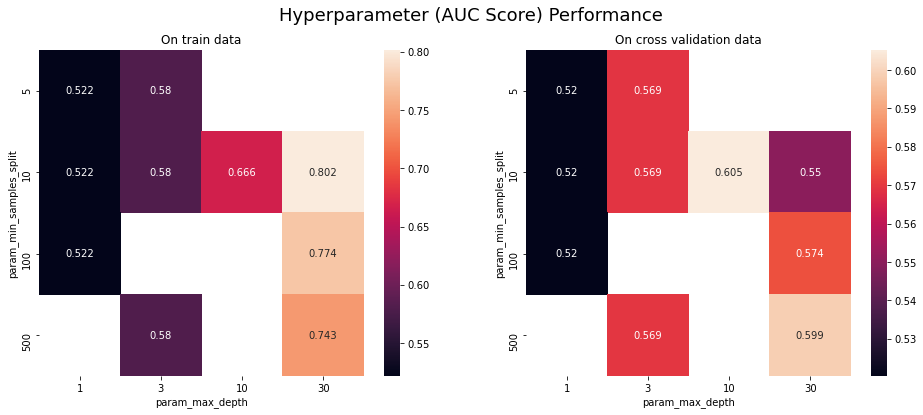

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
fig.suptitle('Hyperparameter (AUC Score) Performance', fontsize = 18)

# https://stackoverflow.com/a/39133654
    
fig_1 = sns.heatmap(max_performance.mean_train_score, annot = True, fmt='.3g', ax = axes[0])
fig_1.title.set_text('On train data')

fig_2 = sns.heatmap(max_performance.mean_test_score, annot = True, fmt='.3g', ax = axes[1])
fig_2.title.set_text('On cross validation data')

plt.show()

#### <font color='Red'> <b>3d plot</b></font>

- You need to plot the performance of model both on train data and cross validation data for each hyper parameter<br>
- With X-axis as **min_sample_split**, Y-axis as **max_depth**, and Z-axis as **AUC Score**

In [17]:
#Reference : 3d_scatter_plot.ipynb

x1 = r_search.cv_results_['param_min_samples_split']
y1 = r_search.cv_results_['param_max_depth']
z1 = r_search.cv_results_['mean_train_score']

x2 = r_search.cv_results_['param_min_samples_split']
y2 = r_search.cv_results_['param_max_depth']
z2 = r_search.cv_results_['mean_test_score']

# https://plot.ly/python/3d-axes/

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
fig.show()

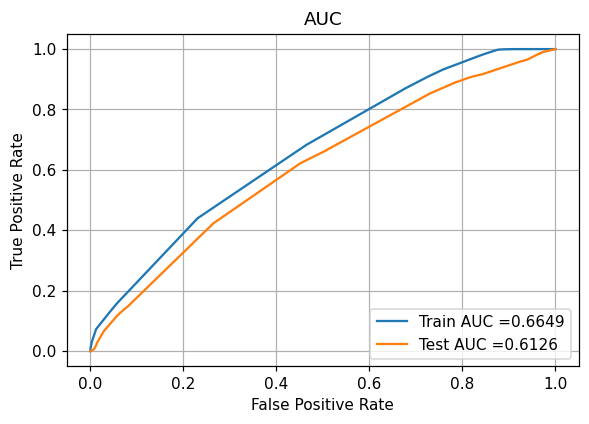

In [18]:
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

tfidf_dt = DecisionTreeClassifier(criterion='gini', max_depth = tfidf_depth,
                                              min_samples_split = tfidf_min_samp)

tfidf_dt.fit(tfidf_x_train_stack, y_train)

y_train_tfidf_pred = tfidf_dt.predict_proba(tfidf_x_train_stack)[:,1]
y_test_tfidf_pred = tfidf_dt.predict_proba(tfidf_x_test_stack)[:,1]

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tfidf_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tfidf_pred)

auc_train_set1 = auc(train_fpr, train_tpr)
auc_test_set1 = auc(test_fpr, test_tpr)

#Reference : DonorchooseNB assignment
plt.figure(dpi =110)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(round(auc_train_set1,4)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(round(auc_test_set1,4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.grid()
plt.legend(loc=4)
plt.show()

In [19]:
# 11. Plot confusion matrix based on best threshold value
# Reference DonorchooseNB

def best_threshold_and_y_pred(threshould, proba, fpr, tpr):
    
    best_t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", round(max(tpr*(1-fpr)),5), "for threshold", np.round(best_t,3))
   
    predictions = []
    for i in tqdm(proba):
        if i >= best_t:
            predictions.append(1)
        else:
            predictions.append(0)
    return best_t, predictions

# print('Train')
# print('=' * 5)
# thr_tfidf_tr, predictions_tfidf_tr = best_threshold_and_y_pred(tr_thresholds,
#                                                             y_train_tfidf_pred, train_fpr, train_tpr)
# tr_confusion_mat_tfidf = confusion_matrix(y_train, predictions_tfidf_tr)

print('\nTest')
print('=' * 4)
thr_tfidf_te, predictions_tfidf_te = best_threshold_and_y_pred(te_thresholds,
                                                               y_test_tfidf_pred, test_fpr, test_tpr)
te_confusion_mat_tfidf = confusion_matrix(y_test, predictions_tfidf_te)

# print('\nTrain confusion matrix : \n', tr_confusion_mat_tfidf)
print('\nTest confusion matrix : \n', te_confusion_mat_tfidf)


Test
====
The maximum value of tpr*(1-fpr) 0.34117 for threshold 0.845


  0%|          | 0/15000 [00:00<?, ?it/s]


Test confusion matrix : 
 [[1317 1085]
 [4759 7839]]


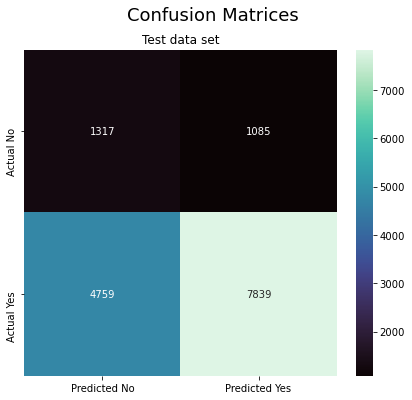

In [20]:
# https://stackoverflow.com/a/61748695
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

fig, axes = plt.subplots(figsize = (7,6))
fig.suptitle('Confusion Matrices', fontsize = 18)

fig = sns.heatmap(te_confusion_mat_tfidf, annot=True,fmt="d", cmap='mako')
fig.title.set_text('Test data set')
axes.set_xticklabels(['Predicted No', 'Predicted Yes'])
axes.set_yticklabels(['Actual No', 'Actual Yes'])
plt.show()

  0%|          | 0/15000 [00:00<?, ?it/s]

No. of Fasle Positive date points : 1085


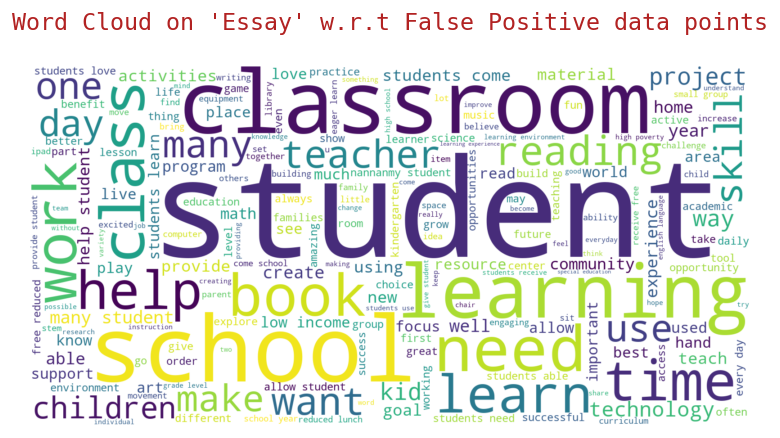

In [21]:
# 12. Find all the false positive data points and plot wordcloud of essay text and
# pdf of teacher_number_of_previously_posted_projects.

count = 0
fp_index = []

for idx, i in enumerate(tqdm(range(len(y_test)))):
    if y_test[i] == 0 and y_test_tfidf_pred[i] >= thr_tfidf_te :
        fp_index.append(idx)
        count += 1
print(f'No. of Fasle Positive date points : {count}')

# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

word_cloud_words = ''
teacher_previous_posted_projects_fp = []
fp_price = []

for i in fp_index:
    word_cloud_words += x_test.iloc[i]['essay']
    teacher_previous_posted_projects_fp.append(
            x_test.iloc[i]['teacher_number_of_previously_posted_projects'])
    fp_price.append( x_test.iloc[i]['price'])
    
# https://matplotlib.org/stable/gallery/color/named_colors.html

word_cloud = WordCloud(width = 1600, height = 800,
                background_color ='white', min_font_size = 6).generate(word_cloud_words)
                    
plt.figure(dpi = 120, facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud on 'Essay' w.r.t False Positive data points\n", c = 'firebrick', size = 14,
         fontfamily = 'monospace')
plt.tight_layout(pad = 0)
plt.show()

**<font color='red'>Observation</font>**

* From the word cloud it shows the most occured words are 'student', 'classroom', 'school', 'learning' and more.
* All the words are related to only the classroom environment
* The use of jargon or technical words are not common.
* `Book` and `Reading` are used more frequently.
* Most words used for the proposal are simple language words

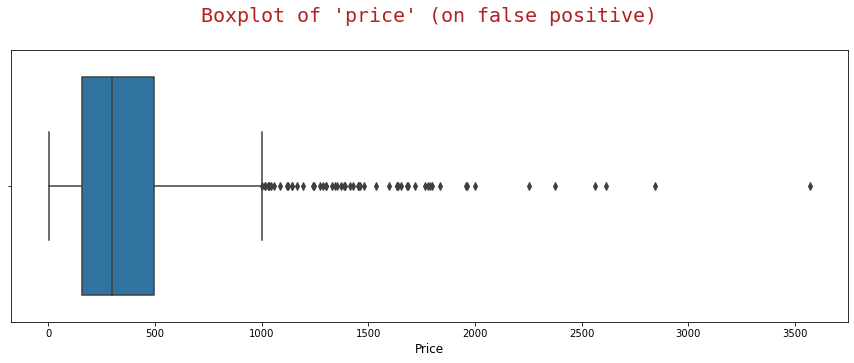

In [22]:
#Boxplot on price(on false positive)

plt.figure(figsize = (15,5), facecolor = None)
fig = sns.boxplot(x = fp_price)
# plt.title("Boxplot of 'price'", size = 12)
plt.title("Boxplot of 'price' (on false positive)\n", c = 'firebrick',  fontsize = 20,
                                              fontfamily = 'monospace')
plt.xlabel('Price', fontsize = 12)
plt.show()

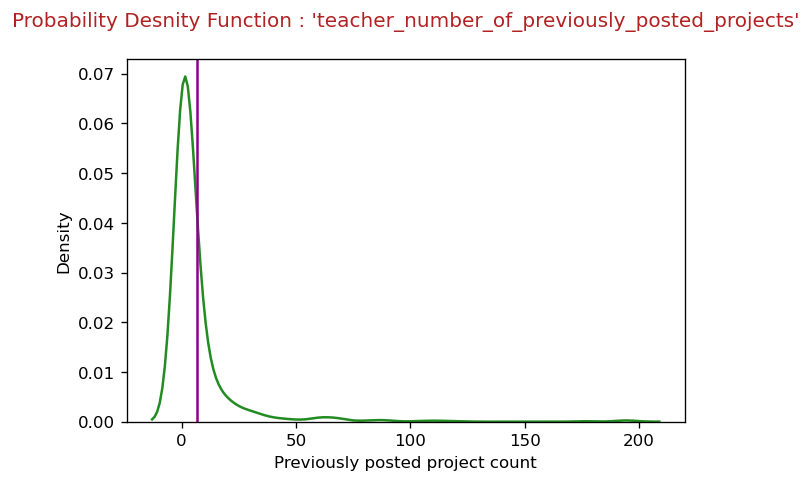

In [23]:
# Probability Desnity Function : 'teacher_number_of_previously_posted_projects'

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://youtu.be/Pkvdc2Z6eBg?t=1312

mean_proj = np.mean(teacher_previous_posted_projects_fp)

plt.figure(dpi = 120, facecolor = None)
fig = sns.kdeplot(teacher_previous_posted_projects_fp, c ='forestgreen')
plt.title("Probability Desnity Function : 'teacher_number_of_previously_posted_projects'\n",
         c = 'firebrick',  fontsize = 12)
plt.xlabel('Previously posted project count')
plt.axvline(mean_proj, c = 'darkmagenta')
plt.show()

**<font color='red'>Observation</font>**

- The `mean` line (vertical line) is drawn are right side of the plot
- It's a right skewed plot, and most values are between 0 - 50
- In the teachers mostly submitted project proposales in a range interwel 0 -50
- Most frequent no. of project submission are in between 10 - 20 
- The teachers who sumbitted projects more than 100 are less.
- In range `0 - 50`, the curve behaves like a `normal distribution / bell curve`

## <font color='red'>Set 2</font>

In [24]:
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.

dt_C = DecisionTreeClassifier()

parameters= {'max_depth' : [1, 3, 10, 30], 'min_samples_split' : [5, 10, 100, 500]}

clf = RandomizedSearchCV(dt_C, parameters, cv = 10, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs =-1)

r_search = clf.fit(tfidf_w2v_x_train_stack, y_train)
best_params_tfidf_w2v = r_search.best_params_

print(f'Best parameters fron TF-IDF W2V model : {best_params_tfidf}')

tfidf_w2V_min_samp = best_params_tfidf_w2v['min_samples_split']
tfidf_w2v_depth = best_params_tfidf_w2v['max_depth']

data = {'param_max_depth' : r_search.cv_results_['param_max_depth'],
        'param_min_samples_split' : r_search.cv_results_['param_min_samples_split'],
       'mean_train_score' : r_search.cv_results_['mean_train_score'],
       'mean_test_score' : r_search.cv_results_['mean_test_score']}

performance = pd.DataFrame(data)
# performance.head()

Best parameters fron TF-IDF W2V model : {'min_samples_split': 10, 'max_depth': 10}


In [25]:
max_performance = performance.groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()
max_performance

mean_train_score                                \
param_max_depth                       1         3         10        30   
param_min_samples_split                                                  
5                               0.558538       NaN  0.774764       NaN   
10                                   NaN  0.611692  0.772669  0.991640   
100                                  NaN  0.611692       NaN  0.914616   
500                             0.558538       NaN  0.713308  0.772543   

                        mean_test_score                                
param_max_depth                      1         3         10        30  
param_min_samples_split                                                
5                              0.552578       NaN  0.577854       NaN  
10                                  NaN  0.591551  0.579815  0.510554  
100                                 NaN  0.591551       NaN  0.551785  
500                            0.552578       NaN  0.593520  0.589751

#### <font color='Red'> <b>Heat Map</b></font>
- You need to plot the performance of model both on train data and cross validation data for each hyper parameter<br>
- Rows as **min_sample_split**, columns as **max_depth**, and values inside the cell representing **AUC Score**

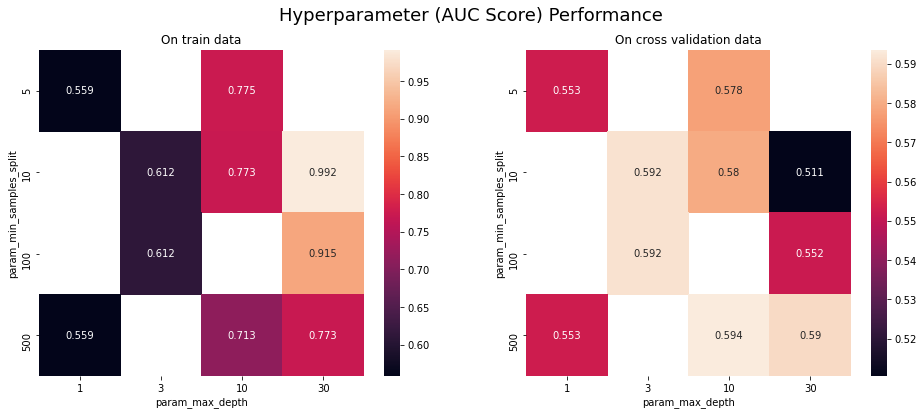

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
fig.suptitle('Hyperparameter (AUC Score) Performance', fontsize = 18)

# https://stackoverflow.com/a/39133654
    
fig_1 = sns.heatmap(max_performance.mean_train_score, annot = True, fmt='.3g', ax = axes[0])
fig_1.title.set_text('On train data')

fig_2 = sns.heatmap(max_performance.mean_test_score, annot = True, fmt='.3g', ax = axes[1])
fig_2.title.set_text('On cross validation data')

plt.show()

#### <font color='Red'> <b>3d plot</b></font>

- You need to plot the performance of model both on train data and cross validation data for each hyper parameter<br>
- With X-axis as **min_sample_split**, Y-axis as **max_depth**, and Z-axis as **AUC Score**

In [27]:
#Reference : 3d_scatter_plot.ipynb

x1 = r_search.cv_results_['param_min_samples_split']
y1 = r_search.cv_results_['param_max_depth']
z1 = r_search.cv_results_['mean_train_score']

x2 = r_search.cv_results_['param_min_samples_split']
y2 = r_search.cv_results_['param_max_depth']
z2 = r_search.cv_results_['mean_test_score']

# https://plot.ly/python/3d-axes/

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
fig.show()

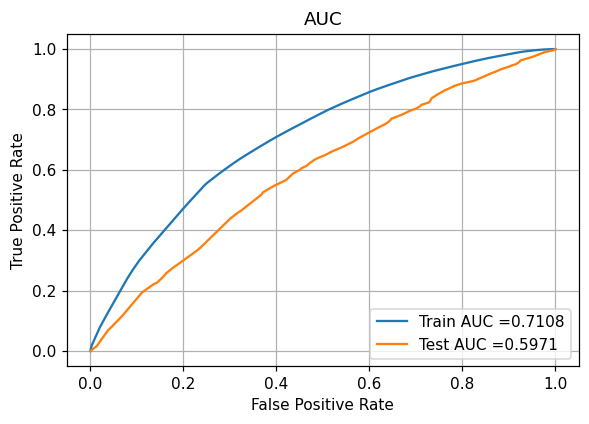

In [28]:
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

tfidf_w2v_dt = DecisionTreeClassifier(criterion='gini', max_depth = tfidf_w2v_depth,
                                              min_samples_split = tfidf_w2V_min_samp)

tfidf_w2v_dt.fit(tfidf_w2v_x_train_stack, y_train)

y_train_tfidf_w2v_pred = tfidf_w2v_dt.predict_proba(tfidf_w2v_x_train_stack)[:,1]
y_test_tfidf_w2v_pred = tfidf_w2v_dt.predict_proba(tfidf_w2v_x_test_stack)[:,1]

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tfidf_w2v_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tfidf_w2v_pred)

auc_train_set2 = auc(train_fpr, train_tpr)
auc_test_set2 = auc(test_fpr, test_tpr)

#Reference : DonorchooseNB assignment
plt.figure(dpi =110)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(round(auc_train_set2,4)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(round(auc_test_set2,4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.grid()
plt.legend(loc=4)
plt.show()

In [29]:
# 11. Plot confusion matrix based on best threshold value
# Reference DonorchooseNB

def best_threshold_and_y_pred(threshould, proba, fpr, tpr):
    
    best_t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", round(max(tpr*(1-fpr)),5), "for threshold", np.round(best_t,3))
   
    predictions = []
    for i in tqdm(proba):
        if i >= best_t:
            predictions.append(1)
        else:
            predictions.append(0)
    return best_t, predictions

# print('Train')
# print('=' * 5)
# thr_tfidf_w2v_tr, predictions_tfidf_w2v_tr = best_threshold_and_y_pred(tr_thresholds,
#                                                             y_train_tfidf_w2v_pred, train_fpr, train_tpr)
# tr_confusion_mat_tfidf_w2v = confusion_matrix(y_train, predictions_tfidf_w2v_tr)

print('\nTest')
print('=' * 4)
thr_tfidf_w2v_te, predictions_tfidf_w2v_te = best_threshold_and_y_pred(te_thresholds,
                                                                y_test_tfidf_w2v_pred, test_fpr, test_tpr)
te_confusion_mat_tfidf_w2v = confusion_matrix(y_test, predictions_tfidf_w2v_te)

# print('\nTrain confusion matrix : \n', tr_confusion_mat_tfidf_w2v)
print('\nTest confusion matrix : \n', te_confusion_mat_tfidf_w2v)


Test
====
The maximum value of tpr*(1-fpr) 0.3318 for threshold 0.852


  0%|          | 0/15000 [00:00<?, ?it/s]


Test confusion matrix : 
 [[1355 1047]
 [5188 7410]]


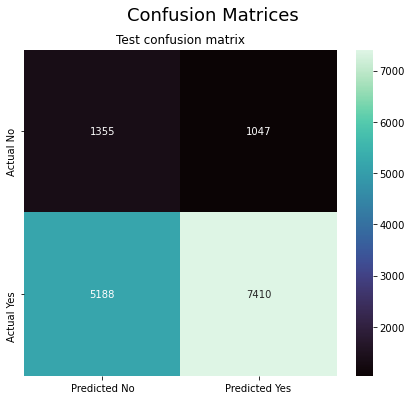

In [30]:
# https://stackoverflow.com/a/61748695
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

fig, axes = plt.subplots(figsize = (7,6))
fig.suptitle('Confusion Matrices', fontsize = 18)

fig = sns.heatmap(te_confusion_mat_tfidf_w2v, annot=True,fmt="d", cmap='mako')
fig.title.set_text('Test confusion matrix')
axes.set_xticklabels(['Predicted No', 'Predicted Yes'])
axes.set_yticklabels(['Actual No', 'Actual Yes'])
plt.show()

  0%|          | 0/15000 [00:00<?, ?it/s]

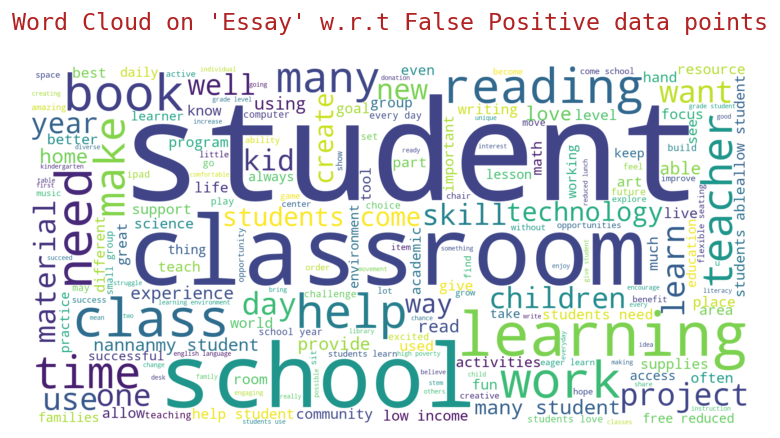

In [31]:
# 12. Find all the false positive data points and plot wordcloud of essay text and
# pdf of teacher_number_of_previously_posted_projects.

count = 0
fp_index = []
for idx, i in enumerate(tqdm(range(len(y_test)))):
    if y_test[i]== 0 and y_test_tfidf_w2v_pred[i] >= thr_tfidf_w2v_te:
        fp_index.append(idx)
        count += 1
# print(f'No. of Fasle Positive date points : {count}')

# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

word_cloud_words = ''
teacher_previous_posted_project_fp = []
fp_price = []

for i in fp_index:
    word_cloud_words += x_test.iloc[i]['essay']
    teacher_previous_posted_project_fp.append(
            x_test.iloc[i]['teacher_number_of_previously_posted_projects'])
    fp_price.append( x_test.iloc[i]['price']) 
    
# https://matplotlib.org/stable/gallery/color/named_colors.html

word_cloud = WordCloud(width = 1600, height = 800,
                background_color ='white', min_font_size = 6).generate(word_cloud_words)
                    
plt.figure(dpi = 120, facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud on 'Essay' w.r.t False Positive data points\n", c = 'firebrick', size = 14,
         fontfamily = 'monospace')
plt.tight_layout(pad = 0)
plt.show()

**<font color='red'>Observation</font>**

* From the word cloud it shows the most occured words are 'student', 'classroom', 'school', 'time' and more.
* All the words are related to only the classroom environment
* `Skill` in here shows the importance of developing skills from the primary education
* The use of technical jargon are not common.
* `Book` and `Reading` used alot.
* Words used for the proposal are simple once.
* `Community`, `projects` shows its importance

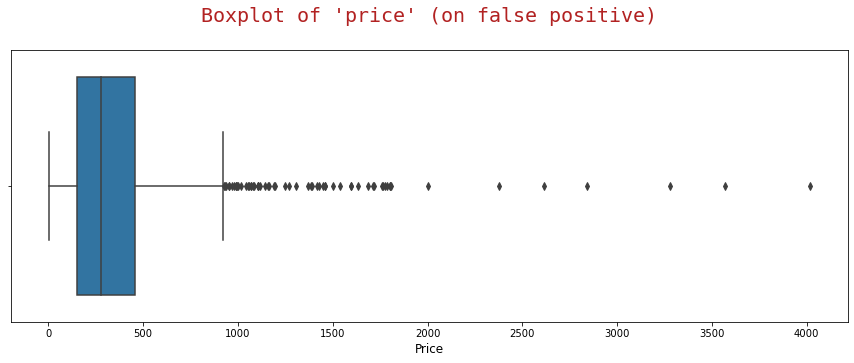

In [32]:
#Boxplot on price(on false positive)

plt.figure(figsize = (15,5), facecolor = None)
fig = sns.boxplot(x = fp_price)
# plt.title("Boxplot of 'price'", size = 12)
plt.title("Boxplot of 'price' (on false positive)\n", c = 'firebrick',  fontsize = 20,
                                      fontfamily = 'monospace')
plt.xlabel('Price', fontsize = 12)
plt.show()

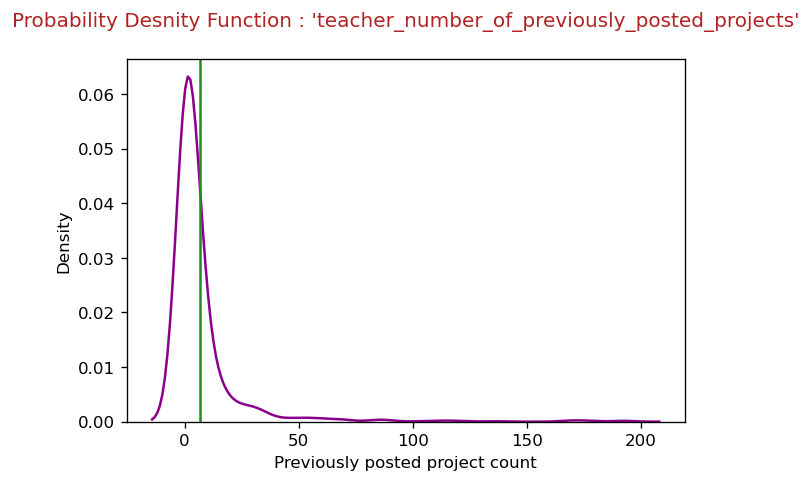

In [33]:
# Probability Desnity Function : 'teacher_number_of_previously_posted_projects'

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://youtu.be/Pkvdc2Z6eBg?t=1312

plt.figure(dpi = 120, facecolor = None)
fig = sns.kdeplot(teacher_previous_posted_project_fp, c ='darkmagenta')
plt.title("Probability Desnity Function : 'teacher_number_of_previously_posted_projects'\n", 
         c = 'firebrick',  fontsize = 12)
plt.xlabel('Previously posted project count')
plt.axvline(mean_proj, c = 'forestgreen')
plt.show()

**<font color='red'>Observation</font>**

- The `mean` line (vertical line) is drawn are right side of the plot
- It's a right skewed plot, and most values are between 0 - 50
- In the teachers mostly submitted project proposales in a range interwel 0 -50
- Most frequent no. of project submission are a range of 10.
- The teachers who sumbitted projects more than 100 are less.
- In range `0 - 50`, the curve behaves like a `normal distribution / bell curve`

# <font color='red'> <b>Task - 2</b></font>

In [34]:
# 1. write your code in following steps for task 2
# 2. select all non zero features

imp_features = tfidf_dt.feature_importances_ #Extracting imp. features from set-1


# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only
    # non zero features

tfidf_x_train_stack_imp_feat = tfidf_x_train_stack[:, imp_features !=0]
tfidf_x_test_stack_imp_feat = tfidf_x_test_stack[:, imp_features !=0]
# print(tfidf_x_train_stack_imp_feat.shape)
# print(tfidf_x_test_stack_imp_feat.shape)

Best parameters fron non-zero TF-IDF model : 500


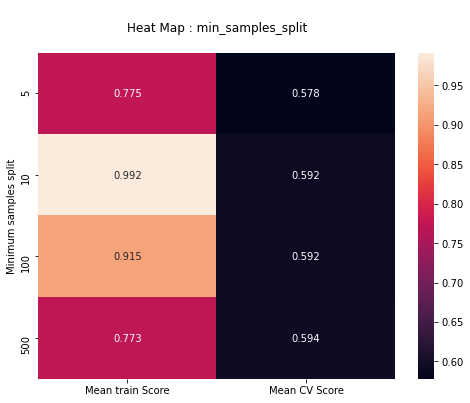

In [35]:
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.

dt_C = DecisionTreeClassifier()

# 200 , 250 was added to `parameters` list beacuse the model performance was poor on initial 
# `parameters` values

parameters = {'min_samples_split' : [5, 10, 100,200 , 250, 500]}

'''
clf = RandomizedSearchCV(dt_C, parameters, cv = 10, scoring = 'roc_auc', 
                         return_train_score = True, n_jobs =-1)

/home/jishnu/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285:UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations.
For exhaustive searches, use GridSearchCV.
'''

clf = GridSearchCV(dt_C, parameters, cv = 15, scoring = 'roc_auc',
                   return_train_score = True, n_jobs = -1)

g_search = clf.fit(tfidf_x_train_stack_imp_feat, y_train)

best_params_tfidf_imp = g_search.best_params_['min_samples_split']

print(f'Best parameters fron non-zero TF-IDF model : {best_params_tfidf_imp}')

# Taking the parameters

data = {'param_min_samples_split' : r_search.cv_results_['param_min_samples_split'],
       'mean_train_score' : r_search.cv_results_['mean_train_score'],
       'mean_test_score' : r_search.cv_results_['mean_test_score']}

df_hyper = pd.DataFrame(data)
df_hyper_gr = df_hyper.groupby(['param_min_samples_split']).max()

# Creating heatmap

fig, axes = plt.subplots(figsize = (8,6))
fig = sns.heatmap(df_hyper_gr, annot = True, fmt='.3g')

plt.title('\nHeat Map : min_samples_split\n')
axes.set_xticklabels(['Mean train Score', 'Mean CV Score'])
plt.ylabel('Minimum samples split')

plt.show()

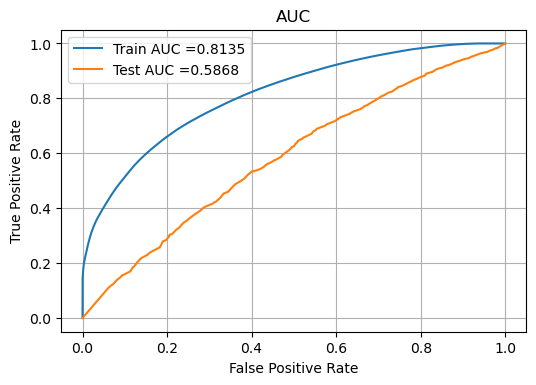

In [36]:
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.

final_dt = DecisionTreeClassifier(criterion='gini', min_samples_split = best_params_tfidf_imp)

final_dt.fit(tfidf_x_train_stack_imp_feat, y_train)

y_train_final_pred = final_dt.predict_proba(tfidf_x_train_stack_imp_feat)[:,1]
y_test_final_pred = final_dt.predict_proba(tfidf_x_test_stack_imp_feat)[:,1]

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_final_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_final_pred)


auc_train_set_f = auc(train_fpr, train_tpr)
auc_test_set_f = auc(test_fpr, test_tpr)

#Reference : DonorchooseNB assignment
plt.figure(dpi =100)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(round(auc_train_set_f,4)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(round(auc_test_set_f,4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.grid()
plt.legend()
plt.show()

**<font color='red'>Observation</font>**

- The **ROC-AUC Curve** is not looking good.
- The train and test scores are far from each other.
- Model behaves like, its over-fitted, because the gap is high
- By removing the zero valued freatures, we improved the `train score` but not the `test score`.

|  | TPR no Train data | TPR on Test data |
| :---: | :---: | :---: |
| FPR = ~0.1 | ~0.5 | ~0.175 |
| FPR = 0.2 | ~0.7 | ~0.3 |
| FPR = 0.6 | ~0.9 | ~0.7 |

https://stats.stackexchange.com/a/389884


Test
====
The maximum value of tpr*(1-fpr) 0.32012 for threshold 0.886


  0%|          | 0/15000 [00:00<?, ?it/s]


Test confusion matrix : 
 [[1443  959]
 [5885 6713]]


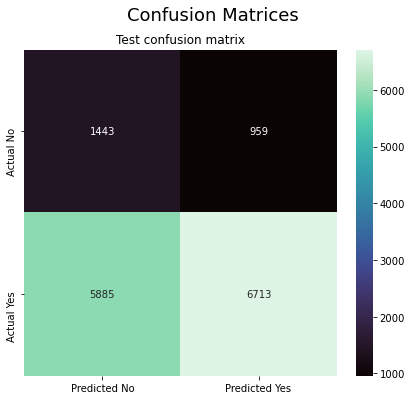

In [37]:
def best_threshold_and_y_pred(threshould, proba, fpr, tpr):
    
    best_t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", round(max(tpr*(1-fpr)),5), "for threshold", np.round(best_t,3))
   
    predictions = []
    for i in tqdm(proba):
        if i >= best_t:
            predictions.append(1)
        else:
            predictions.append(0)
    return best_t, predictions

print('\nTest')
print('=' * 4)
thr_tfidf_te, predictions_tfidf_te = best_threshold_and_y_pred(te_thresholds,
                                                               y_test_final_pred, test_fpr, test_tpr)
te_confusion_mat_final = confusion_matrix(y_test, predictions_tfidf_te)
print('\nTest confusion matrix : \n', te_confusion_mat_final)

# https://stackoverflow.com/a/61748695

fig, axes = plt.subplots(figsize = (7,6))
fig.suptitle('Confusion Matrices', fontsize = 18)

fig = sns.heatmap(te_confusion_mat_final, annot=True,fmt="d", cmap='mako')
fig.title.set_text('Test confusion matrix')
axes.set_xticklabels(['Predicted No', 'Predicted Yes'])
axes.set_yticklabels(['Actual No', 'Actual Yes'])
plt.show()

In [38]:
# Tabulate your results
# Reference Link for Pretty table: https://pypi.org/project/prettytable/

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Hyper Para-min_sample', 'Hyper Para-max_depth',
                                                                    'AUC (train)', 'AUC (test)']
x.add_row(['TFIDF', 'DecisionTreeClassifier', tfidf_min_samp, tfidf_depth, round(auc_train_set1,4),
                                                                    round(auc_test_set1,3)])
x.add_row(['TFIDF W2V', 'DecisionTreeClassifier', tfidf_w2V_min_samp, tfidf_w2v_depth,
                                                   round(auc_train_set2,4), round(auc_test_set2,3)])
x.add_row(['TFIDF ', 'Non-Zero DT-Classifier', best_params_tfidf_imp, 'sk-learn default',
                                                   round(auc_train_set_f,4), round(auc_test_set_f,3)])

print(x)

+------------+------------------------+-----------------------+----------------------+-------------+------------+
| Vectorizer |         Model          | Hyper Para-min_sample | Hyper Para-max_depth | AUC (train) | AUC (test) |
+------------+------------------------+-----------------------+----------------------+-------------+------------+
|   TFIDF    | DecisionTreeClassifier |           10          |          10          |    0.6649   |   0.613    |
| TFIDF W2V  | DecisionTreeClassifier |          500          |          10          |    0.7108   |   0.597    |
|   TFIDF    | Non-Zero DT-Classifier |          500          |   sk-learn default   |    0.8135   |   0.587    |
+------------+------------------------+-----------------------+----------------------+-------------+------------+
